Problem:
Predict if a person will buy a product based on their age and salary.

Dataset:
We'll generate a synthetic dataset with sklearn's make_classification function.



In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


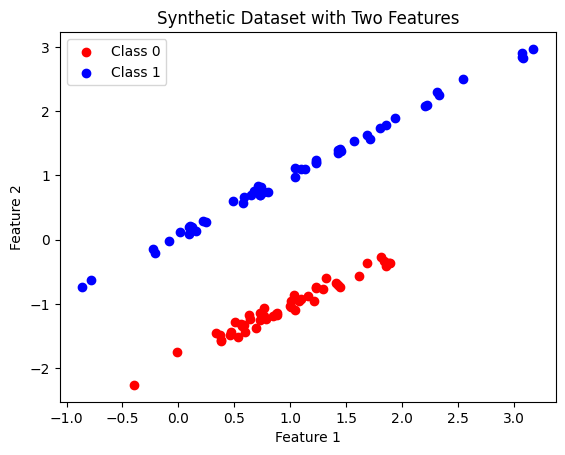

In [102]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_classification(
    n_samples=100,
    n_features=2,          # Generate two features
    n_informative=2,       # Both features are informative
    n_redundant=0,         # No redundant features
    n_clusters_per_class=1,
    random_state=42
)

# Visualize the dataset
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0')  # Feature indices: 0, 1
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')  # Feature indices: 0, 1
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title("Synthetic Dataset with Two Features")
plt.show()


In [103]:
# Reshape y to be (100, 1)
y = y.reshape(-1, 1)  # -1 automatically infers the number of rows
assert y.shape == (100, 1)



Define init to zeros

In [104]:
def init_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    return w,b

In [105]:
w, b = init_with_zeros(4)

In [106]:
w.shape

(4, 1)

Define a sigmod function

In [107]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

Define a cost function

In [108]:
def cost_function(X,y,w,b):
    m = X.shape[0]
    A = sigmoid(X@w + b)
    cost = (-1/m)*(np.log(A)*y+(1-y)*np.log(1-A))
    return cost

Define back prop

## Logistic Regression: Cost Function and Gradients

#### 1. Cost Function

The cost function is:

$$
J(w, b) = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log(A^{(i)}) + (1 - y^{(i)}) \log(1 - A^{(i)}) \right]
$$

**Where:**

$$
A = \sigma(X @ w + b)
$$
Is the predicted probabilities.  

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
Is the sigmoid function.  


---

#### 2. Gradients

###### Gradient with Respect to \( w \)

The gradient with respect to weights:

$$
\frac{\partial J}{\partial w} = \frac{1}{m} X^T (A - y)
$$

###### Gradient with Respect to \( b \)

The gradient with respect to bias:

$$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (A^{(i)} - y^{(i)})
$$

---

#### 3. Derivative Explanation

The sigmoid derivative is:

$$
\frac{\partial \sigma(z)}{\partial z} = \sigma(z)(1 - \sigma(z)) = A(1 - A)
$$

Using the chain rule for the cost function:

$$
\frac{\partial J_i}{\partial z^{(i)}} = A^{(i)} - y^{(i)}
$$

---

#### Final Results

1. **Gradient with Respect to \( w \):**

$$
\frac{\partial J}{\partial w} = \frac{1}{m} X^T (A - y)
$$

2. **Gradient with Respect to \( b \):**

$$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (A^{(i)} - y^{(i)})
$$


In [109]:
def back_prop(w, b, X, y):
    m = X.shape[0]
    A = sigmoid(X@w + b)
    cost = cost_function(X,y,w,b)
    dw = (1/m)*(X.T@(A-y))
    db = (1/m)*(A-y)
    return dw,db

Define gradient descent

In [110]:
def grad_descent(learning_rate, epochs, X, y, w, b):
    """
    Perform gradient descent to optimize weights and bias.

    Parameters:
    - learning_rate: float, learning rate for gradient descent.
    - epochs: int, number of iterations.
    - X: numpy array, feature matrix.
    - y: numpy array, labels.
    - w: numpy array, weights.
    - b: float, bias.

    Returns:
    - weights: numpy array, optimized weights.
    - bias: float, optimized bias.
    - costs: list, cost at each iteration.
    """
    weights = w
    bias = b
    costs = []

    for i in range(epochs):
        # Compute predictions
        A = sigmoid(X @ weights + bias)

        # Compute cost
        cost = -np.mean(y * np.log(A) + (1 - y) * np.log(1 - A))
        costs.append(cost)  # Append scalar cost value

        # Compute gradients
        dw = (1 / X.shape[0]) * (X.T @ (A - y))
        db = (1 / X.shape[0]) * np.sum(A - y)

        # Update parameters
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias, costs


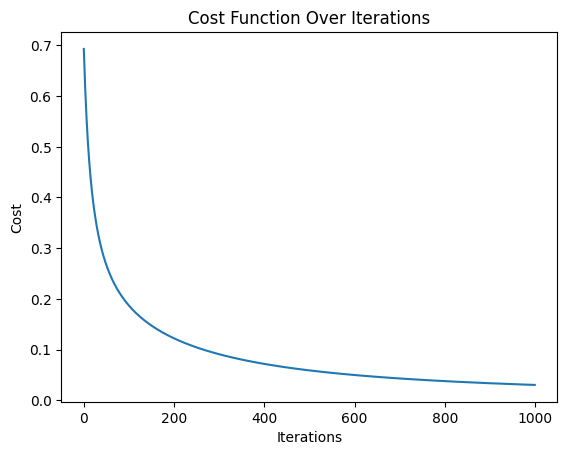

Training Accuracy: 96.00%


In [ ]:
# Step 5: Initialize Parameters
w, b = init_with_zeros(2)
learning_rate = 0.1
iterations = 1000

# Step 6: Train the Model
weights, bias, costs = grad_descent(learning_rate, iterations, X, y, w, b)

# Step 7: Plot the Cost Function Convergence
plt.plot(range(iterations), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.show()

# Step 8: Define the Prediction Function
def predict(X, weights):
    """
    Predict binary classes (0 or 1) using the learned logistic regression weights.
    
    Parameters:
    - X: Numpy array (m x n), where m = number of samples, n = number of features.
    - weights: Numpy array (n,), logistic regression parameters (including bias if present in X).
    
    Returns:
    - Numpy array of predictions (0 or 1) for each sample.
    """
    probabilities = sigmoid(X @ weights)
    return (probabilities >= 0.5).astype(int)

# Step 9: Evaluate the Model
predictions = predict(X, weights)
accuracy = np.mean(predictions == y) * 100
print(f"Training Accuracy: {accuracy:.2f}%")


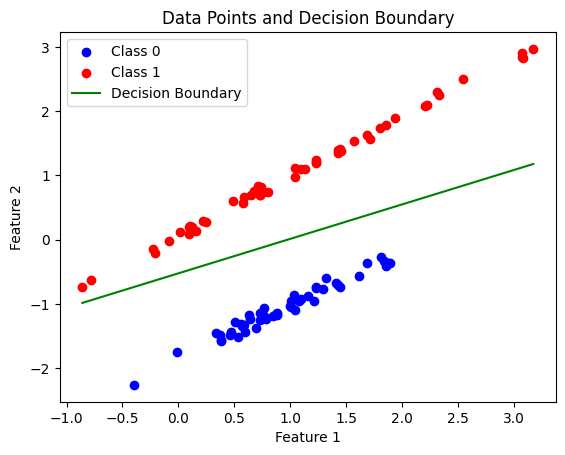

In [118]:
import matplotlib.pyplot as plt
import numpy as np

# Create boolean masks for classes
class0 = (y == 0)
class1 = (y == 1)

# Plot class 0 points
plt.scatter(X[class0, 0], X[class0, 1], color='blue', label='Class 0')

# Plot class 1 points
plt.scatter(X[class1, 0], X[class1, 1], color='red', label='Class 1')

# Plot the decision boundary
# Decision boundary equation: w[0] * x1 + w[1] * x2 + b = 0
# Solve for x2: x2 = -(b + w[0] * x1) / w[1]
x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)

# Ensure weights and bias are correct
b = bias  # replace `bias` with the actual value if named differently
w = weights  # replace `weights` with the actual array of shape (2,)

# Check if w[1] is not zero to avoid division by zero
if w[1] != 0:
    y_values = -(b + w[0] * x_values) / w[1]
    plt.plot(x_values, y_values, color='green', label='Decision Boundary')

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Points and Decision Boundary')
plt.legend()
plt.show()
